<a href="https://colab.research.google.com/github/henokwon/Reboot-The-Earth/blob/main/Reboot_The_Earth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Environment Set up**

In [ ]:
%pip install geemap

In [34]:
import ee
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
ee.Authenticate()
ee.Initialize()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Visualize drought indicators**

In [ ]:

# Authenticate and initialize the Earth Engine API
ee.Authenticate()
ee.Initialize()

In [83]:
# Specify the path to your CSV file
csv_file_path = '/content/drive/My Drive/PDSI.csv'

# Load the data into a DataFrame
pdsi_df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
pdsi_df.head()

,system:time_start,Addis Ababa
0,1-Jul-73,-4.92451
1,1-Aug-73,-4.14395
2,1-Sep-73,-2.95363
3,1-Oct-73,-2.22289
4,1-Nov-73,-1.95649


In [84]:

# Convert the date column to datetime format
pdsi_df['system:time_start'] = pd.to_datetime(pdsi_df['system:time_start'])

# Set the date column as the index
pdsi_df.set_index('system:time_start', inplace=True)

# Display the DataFrame to check the changes
pdsi_df.head()


,Addis Ababa
system:time_start,
2073-07-01,-4.92451
2073-08-01,-4.14395
2073-09-01,-2.95363
2073-10-01,-2.22289
2073-11-01,-1.95649


In [68]:
!pip install statsmodels

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

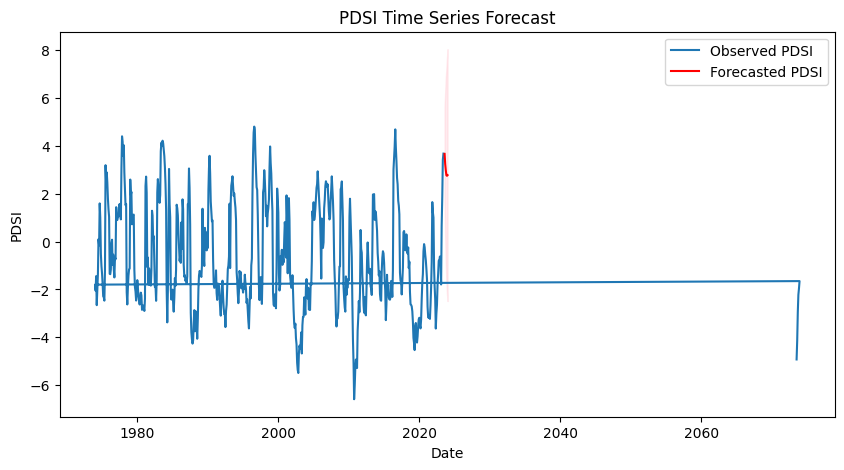

In [85]:
# Fit an ARIMA model
model = ARIMA(pdsi_df['Addis Ababa'], order=(5, 1, 0))
model_fit = model.fit()

# Make a forecast
forecast_steps = 6  # Number of months to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=pdsi_df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Plot the original data and the forecast
plt.figure(figsize=(10, 5))
plt.plot(pdsi_df.index, pdsi_df['Addis Ababa'], label='Observed PDSI')
plt.plot(forecast_dates, forecast_mean, label='Forecasted PDSI', color='red')
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('PDSI')
plt.legend()
plt.title('PDSI Time Series Forecast')
plt.show()
